# PSHA and DSHA Model Calculations

#### PHSA Model Calculation - PSHA involves evaluating the likelihood of different levels of earthquake shaking at a specific location over a certain period

##### Import and Read the data

In [8]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [5]:
# Import scaled earthquake data
df = pd.read_csv('../../Resources/earthquake_data_standardized.csv')
df.head()

,longitude,latitude,depth,magnitude,number_stations,min_station_distance,nodal_plane_1_dip,nodal_plane_1_rake,nodal_plane_1_strike,nodal_plane_2_dip,...,t_axis_plunge,percent_double_couple,scalar_moment,tensor_mpp,tensor_mrp,tensor_mrr,tensor_mrt,tensor_mtp,tensor_mtt,mmi_class
0,-0.858789,0.217395,-0.138401,1.259068,-0.162005,-0.621166,0.764993,0.856091,-0.187953,-3.275980,...,3.288087,-0.131701,-0.058242,-0.053888,-0.019118,-0.003759,-0.020843,-0.042471,0.055255,2
1,-1.586411,1.453026,2.957343,0.278647,-0.799719,0.182939,-0.322804,-1.396320,-0.143028,0.718901,...,0.813702,-0.016844,-0.065891,-0.050703,-0.004675,-0.031174,-0.034918,-0.064978,0.059791,0
2,-0.451425,1.705352,1.297980,0.866900,-0.368324,2.000126,-0.866703,-0.789901,-0.187953,-1.531736,...,-0.542928,-0.045558,-0.062687,-0.048152,0.025176,-0.045815,-0.028006,-0.074322,0.061360,0
3,-0.891745,0.639950,-0.776489,0.808074,-0.405837,-0.566141,-0.594754,-0.010221,0.620696,0.775167,...,-0.274021,-0.138879,-0.063113,-0.047294,-0.015576,-0.037577,-0.028875,-0.058419,0.058169,0
4,0.049063,0.917870,-0.567035,0.866900,1.919944,1.537912,-0.594754,-1.396320,1.564120,0.775167,...,-0.128764,-0.009665,-0.062141,-0.048454,0.008477,-0.034790,-0.019123,-0.052158,0.058550,1


##### Calculate the mean and standard deviation of the earthquake magnitudes 


In [6]:
# Calculate the mean and standard deviation of the earthquake magnitudes
mean_magnitude = df['magnitude'].mean()
std_magnitude = df['magnitude'].std()

In [9]:
# Generate a range of magnitudes
magnitude_range = np.linspace(df['magnitude'].min(), df['magnitude'].max(), 100)

In [ ]:
# Calculate the probability density function for the range of magnitudes
pdf_magnitude = (1/(std_magnitude * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((magnitude_range - mean_magnitude)/std_magnitude)**2)

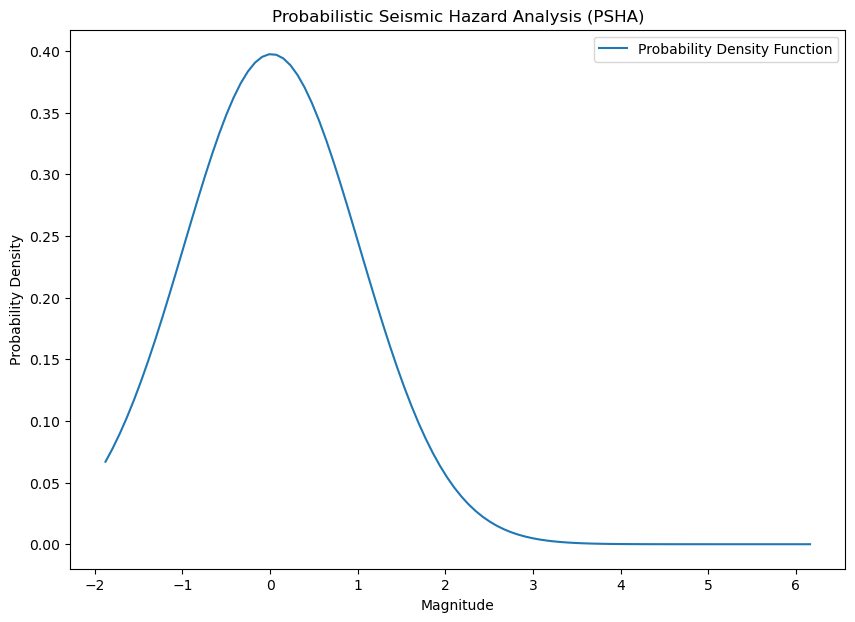

In [ ]:
# Plot the probability density function
plt.figure(figsize=(10, 7))
plt.plot(magnitude_range, pdf_magnitude, label='Probability Density Function')
plt.xlabel('Magnitude')
plt.ylabel('Probability Density')
plt.title('Probabilistic Seismic Hazard Analysis (PSHA)')
plt.legend()
plt.show()

#### DSHA Model Calculation - evaluates the impact of specific earthquake scenarios, often the largest credible earthquake.

In [10]:
# Identify the largest earthquake magnitude
max_magnitude = df['magnitude'].max()
max_eq = df[df['magnitude'] == max_magnitude]

In [11]:
# Print the largest earthquake magnitude
print('Deterministic Seismic Hazard Analysis (DSHA)')
print('Largest Credible Earthquake Magnitude:', max_magnitude)

Deterministic Seismic Hazard Analysis (DSHA)
Largest Credible Earthquake Magnitude: 6.16117022558803


<Axes: xlabel='longitude', ylabel='latitude'>

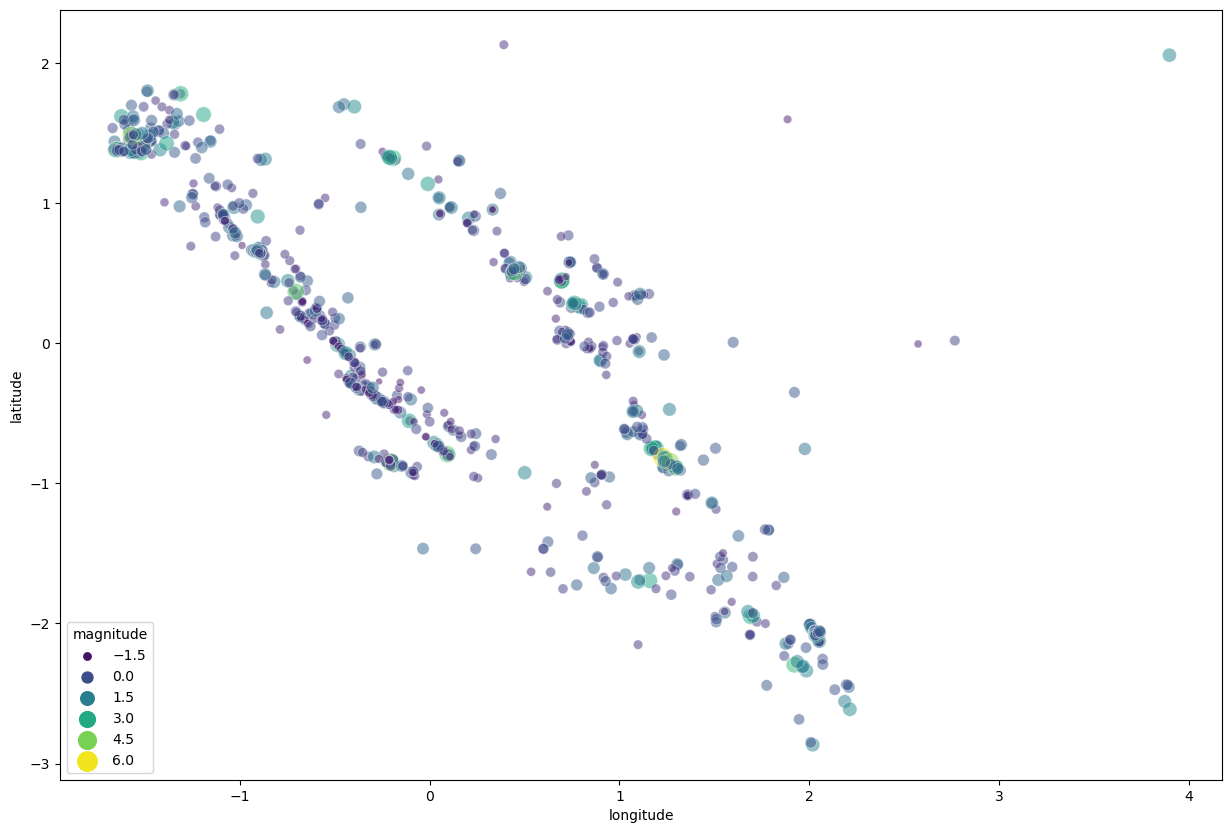

In [12]:
# Plot all earthquakes
plt.figure(figsize=(15, 10))
sns.scatterplot(x='longitude', y='latitude', size='magnitude', hue='magnitude', data=df, sizes=(20, 200), alpha=0.5, palette='viridis')


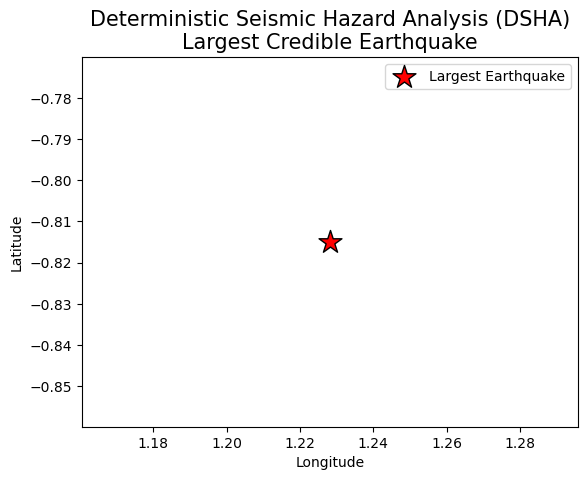

In [15]:
# Highlight the largest earthquake
plt.scatter(max_eq['longitude'], max_eq['latitude'], color='red', s=300, label='Largest Earthquake', edgecolor='black', marker='*')
# Add title and legend
# Add title and legend
plt.title('Deterministic Seismic Hazard Analysis (DSHA)\nLargest Credible Earthquake', fontsize=15)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()